## Predict Loan Eligibility for Dream Housing Finance company


* 1.Description of the Data
* 2.Data Exploration
* 3.Overview about Outliers
* 4.Checking for NULL Values
* 5.Filling of the Row Data
* 6.Clustering Methods
*    6.1 Kmeans
*    6.1.a Determining Number of Clusters with Elbow Method
*    6.1.b Determining Number of Clusters with Silhouette Scores Method
*    6.1 c Kmeans Clustering
*    6.2 Hierarchical Clustering
* 7.Compering Results for the Optimal Number of Cluster Model
* 8.Understanding Clusters by Customer Segmentation

In [3]:
import pandas as pd
import numpy as np
from sklearn import cluster 

import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import LabelEncoder


data=pd.read_csv("F:\\Users\\Python\\clustering.csv")

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,Y


In [5]:
data.shape

(381, 13)

In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


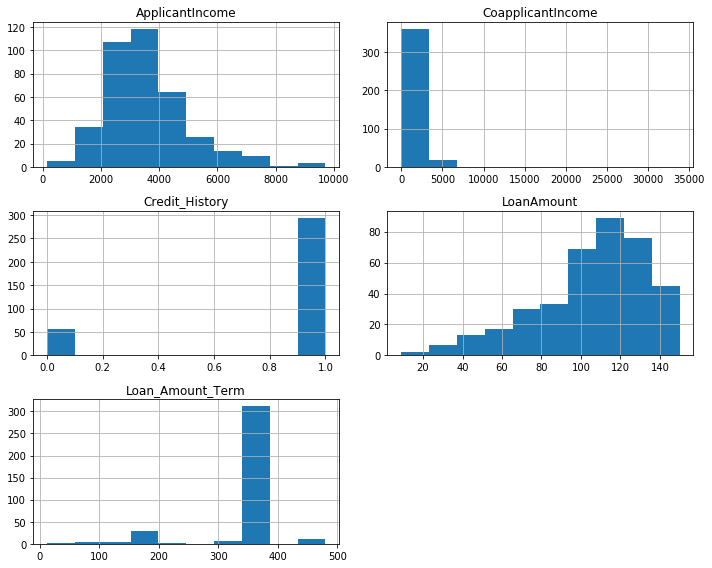

In [8]:
#Frequency variables in charts

data[[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']].hist(figsize=(10,8))
plt.tight_layout()



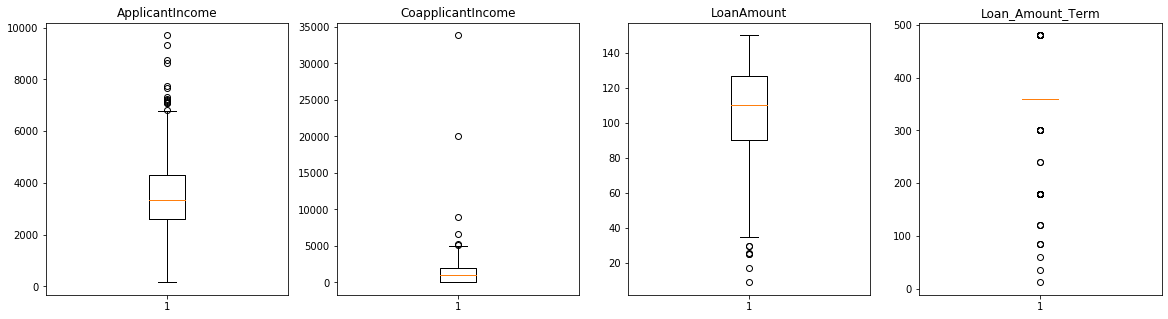

In [9]:
col=[  'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
plt.figure(figsize=(20,5))

for i in range(0,4):
    plt.subplot(1, 4, i+1)
    plt.boxplot(data[col[i]].dropna())
    plt.title(col[i])

Ignore the Outliers for defining Clusters

In [10]:
#data['Loan_Status'] = data['Loan_Status'].replace(['Y','N'],['1','0'])
#data['Loan_Status']

In [11]:
#data['Credit_History'].unique()

In [12]:
#x=data.drop(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       #'Self_Employed','Property_Area'], axis=1, inplace=True)

In [13]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Checking for Null Values

In [15]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
data['Loan_Amount_Term'].value_counts() 

360.0    312
180.0     29
480.0     11
300.0      7
84.0       3
120.0      3
240.0      2
36.0       1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [17]:
data['Credit_History'].value_counts()

1.0    294
0.0     57
Name: Credit_History, dtype: int64

### Replace Null Values

In [18]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [19]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [20]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [21]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [22]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [23]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##                                      6. Clustering Methods

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
norm_data = data.apply(le.fit_transform)  # fit and transforms the data
norm_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,0,251,48,79,8,1,0,0
1,1,1,1,0,0,1,116,0,26,8,1,2,1
2,2,1,1,0,1,0,75,125,71,8,1,2,1
3,3,1,0,0,0,0,298,0,92,8,1,2,1
4,4,1,1,0,1,0,56,49,46,8,1,2,1


### 6.1 Kmeans- Determining Number of Clusters with Elbow Method

In [25]:
km=KMeans(n_clusters=3)
km                                   # consider 3 clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
y_predicted=km.fit_predict(norm_data[[ 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']])

In [27]:
norm_data['cluster']=y_predicted
norm_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,cluster
0,0,1,1,1,0,0,251,48,79,8,1,0,0,1
1,1,1,1,0,0,1,116,0,26,8,1,2,1,2
2,2,1,1,0,1,0,75,125,71,8,1,2,1,2
3,3,1,0,0,0,0,298,0,92,8,1,2,1,1
4,4,1,1,0,1,0,56,49,46,8,1,2,1,2


In [28]:
norm_data['cluster'].unique()    # for cluster=3 , we have generated clusters

array([1, 2, 0])

#### Scale the Transformed data within 0-1

In [29]:
x=norm_data
y=norm_data['Loan_Status']    # Target Variable

In [30]:
x # transformed data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,cluster
0,0,1,1,1,0,0,251,48,79,8,1,0,0,1
1,1,1,1,0,0,1,116,0,26,8,1,2,1,2
2,2,1,1,0,1,0,75,125,71,8,1,2,1,2
3,3,1,0,0,0,0,298,0,92,8,1,2,1,1
4,4,1,1,0,1,0,56,49,46,8,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,376,1,1,3,0,0,291,0,79,8,1,2,1,0
377,377,1,1,0,0,0,144,90,59,8,1,0,1,0
378,378,0,0,0,0,0,103,0,29,8,1,0,1,0
379,379,1,1,3,0,0,224,0,7,5,1,0,1,0


In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            381 non-null    int32
 1   Gender             381 non-null    int32
 2   Married            381 non-null    int32
 3   Dependents         381 non-null    int32
 4   Education          381 non-null    int32
 5   Self_Employed      381 non-null    int32
 6   ApplicantIncome    381 non-null    int64
 7   CoapplicantIncome  381 non-null    int64
 8   LoanAmount         381 non-null    int64
 9   Loan_Amount_Term   381 non-null    int64
 10  Credit_History     381 non-null    int64
 11  Property_Area      381 non-null    int32
 12  Loan_Status        381 non-null    int32
 13  cluster            381 non-null    int32
dtypes: int32(9), int64(5)
memory usage: 28.4 KB


In [32]:
cols = x.columns
cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'cluster'],
      dtype='object')

In [33]:
ms = MinMaxScaler()

X = ms.fit_transform(x)  # fit the transformed data within the scale 0-1

In [34]:
scaled_x = pd.DataFrame(X, columns=[cols])
scaled_x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,cluster
0,0.000000,1.0,1.0,0.333333,0.0,0.0,0.781931,0.265193,0.79,0.888889,1.0,0.0,0.0,0.5
1,0.002632,1.0,1.0,0.000000,0.0,1.0,0.361371,0.000000,0.26,0.888889,1.0,1.0,1.0,1.0
2,0.005263,1.0,1.0,0.000000,1.0,0.0,0.233645,0.690608,0.71,0.888889,1.0,1.0,1.0,1.0
3,0.007895,1.0,0.0,0.000000,0.0,0.0,0.928349,0.000000,0.92,0.888889,1.0,1.0,1.0,0.5
4,0.010526,1.0,1.0,0.000000,1.0,0.0,0.174455,0.270718,0.46,0.888889,1.0,1.0,1.0,1.0


### Check For Cluster K = 3 and Inertia (SSE)

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=40) 

kmeans.fit(scaled_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=40, tol=0.0001, verbose=0)

In [36]:
kmeans.cluster_centers_

array([[ 5.16675101e-01,  8.07692308e-01,  5.57692308e-01,
         2.24358974e-01,  3.26923077e-01,  9.61538462e-02,
         5.07907980e-01,  2.28591160e-01,  5.75961538e-01,
         8.54700855e-01,  4.80769231e-01,  4.95192308e-01,
        -3.33066907e-16,  4.03846154e-01],
       [ 4.80665635e-01,  8.94117647e-01,  1.00000000e+00,
         3.21568627e-01,  2.58823529e-01,  8.82352941e-02,
         4.68187649e-01,  3.43548911e-01,  6.09647059e-01,
         8.32026144e-01,  9.94117647e-01,  5.61764706e-01,
         1.00000000e+00,  5.02941176e-01],
       [ 5.14510576e-01,  5.60747664e-01,  7.77156117e-16,
         6.23052960e-02,  2.33644860e-01,  9.34579439e-02,
         5.08283111e-01,  1.94609387e-01,  5.49906542e-01,
         8.72274143e-01,  9.81308411e-01,  5.00000000e-01,
         9.43925234e-01,  4.34579439e-01]])

In [37]:
kmeans.inertia_

510.85289426337386

### check how many of the samples were correctly labeled for k=3


In [38]:
labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 274 out of 381 samples were correctly labeled.
Accuracy score: 0.72


### 6.1. a. Determining Number of Clusters with Elbow Method

684.7
574.1
510.7
470.2
438.7
410.3
390.2
372.4
358.1
347.9


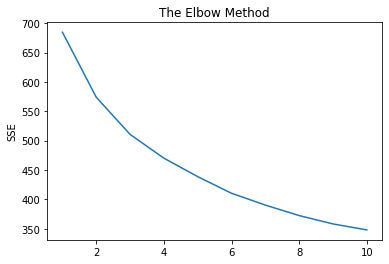

In [39]:
from sklearn.cluster import KMeans
SSE = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_x)
    SSE.append(kmeans.inertia_)
    print(round(SSE[-1],1))
plt.plot(range(1, 11), SSE)
plt.title('The Elbow Method')
plt.ylabel('SSE')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=5,random_state=0)

kmeans.fit(scaled_x)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 97 out of 381 samples were correctly labeled.
Accuracy score: 0.25


### 6.1. b. Determining Number of Clusters with Silhouette Scores Method

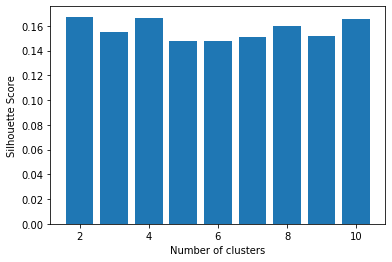

In [41]:

silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(scaled_x, KMeans(n_clusters = n_cluster).fit_predict(scaled_x))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In order to make a decision I checked Silhouette Scores. Even though, 8rd cluster & 3rd cluster model gives the highest score, I considered somewhere in 5th clusters.Because At 5th cluster ,110 out of 381 samples were correctly labeled compared to k=8

### 6.1.c Kmeans Clustering


 To Check Kmeans different number of Clusters k range(2,10)

In [42]:
kmeans_values=[]
for cluster in range(2,10):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(scaled_x)
    sil_score = metrics.silhouette_score(scaled_x,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
            metrics.silhouette_score(scaled_x, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.167
Silhouette score for 3 cluster k-means: 0.158
Silhouette score for 4 cluster k-means: 0.167
Silhouette score for 5 cluster k-means: 0.158
Silhouette score for 6 cluster k-means: 0.148
Silhouette score for 7 cluster k-means: 0.156
Silhouette score for 8 cluster k-means: 0.165
Silhouette score for 9 cluster k-means: 0.167


We decide upon k=5 for k-means:= 0.158 for lower SSE ,instead of k=3

### 6.2 Hierarchical Clustering


In [43]:
siliuette_list_hierarchical = []
for cluster in range(2,10,1):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(scaled_x)
        sil_score = metrics.silhouette_score(scaled_x, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [44]:
df_hierarchical.sort_values('sil_score', ascending=False)


,cluster,sil_score,linkage_method,number_of_clusters
0,2,0.167216,ward,2
2,2,0.164932,complete,2
9,5,0.144522,ward,5
18,8,0.141153,ward,8
1,2,0.136867,average,2
6,4,0.134423,ward,4
4,3,0.133947,average,3
15,7,0.133380,ward,7
3,3,0.129382,ward,3
21,9,0.124399,ward,9


Consider similar value of %15 in 5 cluster model. Due to the results, I choose linkage_method :average , number of cluster:5 The silhouette score of the Agglomerative Clustering solution: 0.1509

In [45]:
hierarchical_ward= AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=6).fit_predict(scaled_x)
hierarchical_average= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=6).fit_predict(scaled_x)
hierarchical_complete= AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=6).fit_predict(scaled_x)

### 7.Compering Results for the Optimal Number of Cluster Model

In [46]:
kmeans_= KMeans(n_clusters=5, random_state=40).fit_predict(scaled_x)
kmeansSilhouette_Score = metrics.silhouette_score(scaled_x, kmeans_, metric='euclidean')
Hierarchical_ward_Silhouette_Score = metrics.silhouette_score(scaled_x, hierarchical_ward, metric='euclidean')
Hierarchical_average_Silhouette_Score = metrics.silhouette_score(scaled_x, hierarchical_average, metric='euclidean')
Hierarchical_complete_Silhouette_Score = metrics.silhouette_score(scaled_x, hierarchical_complete, metric='euclidean')

In [47]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ], 
                                ['Hierarchical-Ward',Hierarchical_ward_Silhouette_Score ],
                                ['Hierarchical-avarage',Hierarchical_average_Silhouette_Score ],
                                ['Hierarchical-complete',Hierarchical_complete_Silhouette_Score ]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
0,KMeans,0.157695
1,Hierarchical-Ward,0.121386
2,Hierarchical-avarage,0.120809
3,Hierarchical-complete,0.087652


In [59]:
kmeans_ = KMeans(n_clusters=5, random_state=40).fit_predict(scaled_x)
data['cluster']=kmeans_

In [60]:
data['cluster'].value_counts()

1    127
3     79
4     67
2     54
0     54
Name: cluster, dtype: int64

From above results we can choose KMeans clustering method which has high silhouette score, after checking clusters and the number of variables in each cluster, this method seems that it is  suitable one to understand this data set.

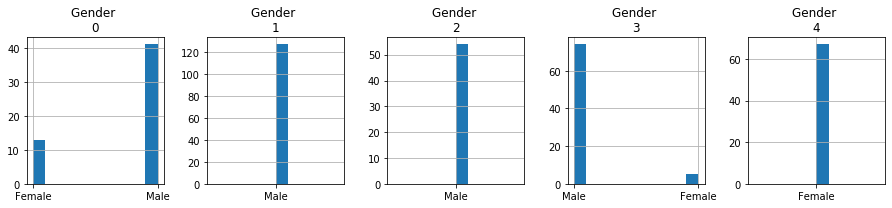

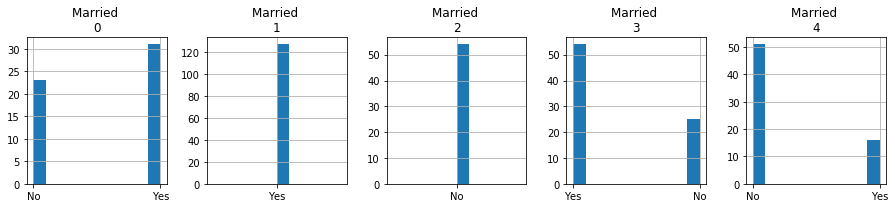

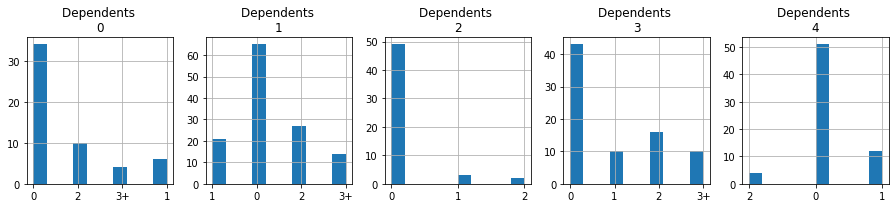

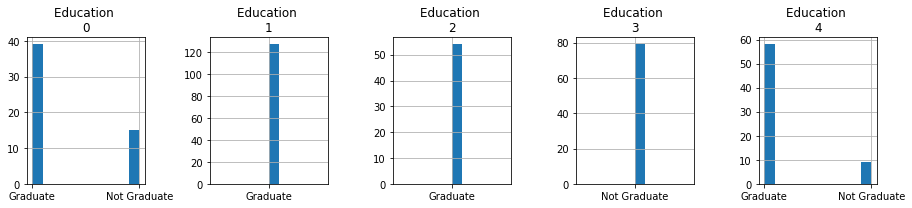

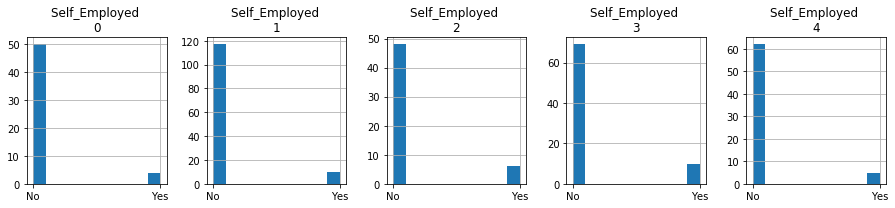

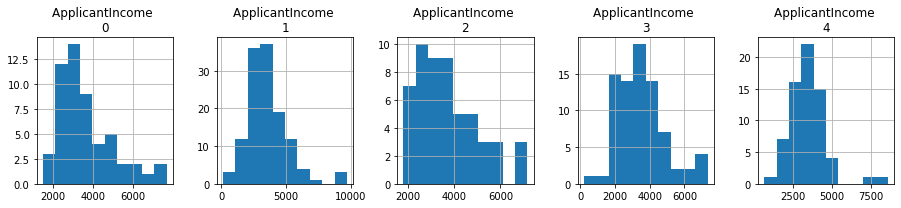

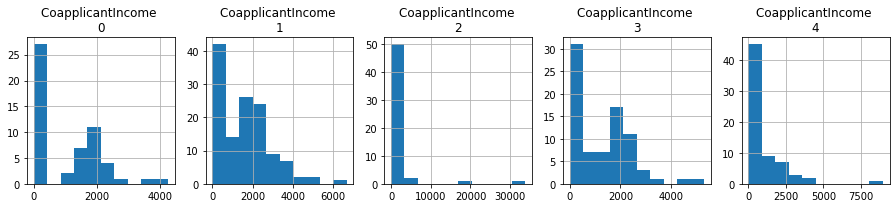

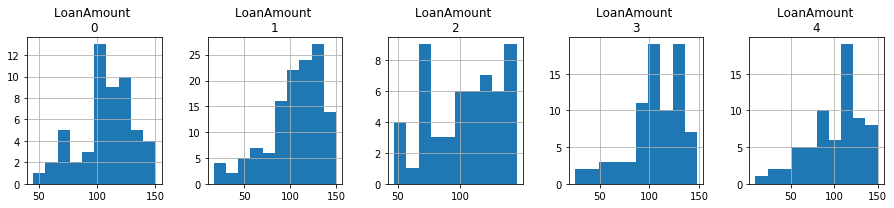

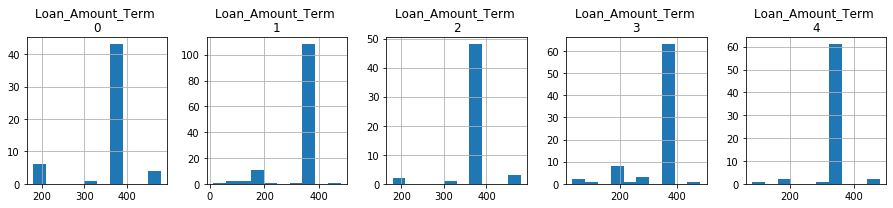

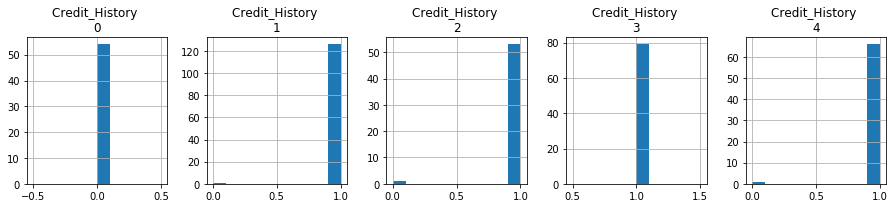

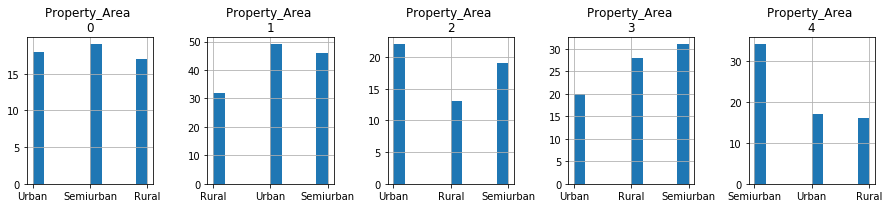

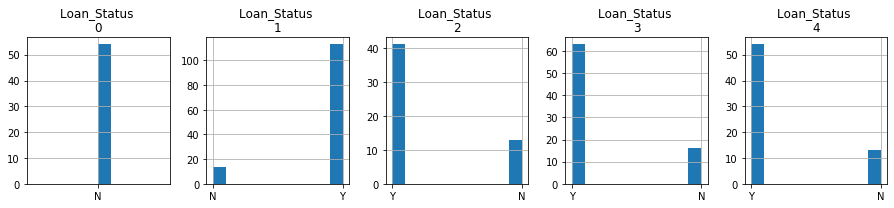

In [76]:
col_list=[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

for column in col_list:
    plt.figure(figsize=(20,3))
    for i in range(0,5):
        plt.subplot(1,8,i+1)
        cluster = data[data['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

### 8. Understanding Clusters by Customer Segmentation

 Kmeans Model with 5 Clusters

|Culsters|Gender | Married|Dependents|Education|Self_employed| ApplicantIncome |CoApplicantIncome| LoanAmount |LoanAmountTerm |CreditHistory|Property_Area |Loan_Status|
| ------------ | ------------- | ----------------- | --------------------- |----------------|----------------|-----------------------|----------------|----------------|----------------|----------------|----------------|------------ |
K=0| F/M| Yes/No | Meduim | Yes/No | No | Low | Low| medium | medium| low |Urban/S-U/R| No|
K=1| M| Yes | Meduim | Yes | No/Yes | low | medium| High | medium| High |Urban/S-U/R| Yes/No|
K=2| M| No | Low | Yes | No/Yes | low | low| High | medium| High |Urban/S-U/R| Yes/No|
K=3| F/M| No | Meduim | No | No/Yes | medium | medium| High | medium| High |S-U/R/Urban| Yes/No|
K=4| F | No/Yes | Low | Yes/No | No/Yes | medium | Low| High | medium| High |S-U/Urban/R|Yes/No|





After executing different methods, I choose the Kmeans Model as data does not include different small groups but very similar in each other. Therefore, I did not prefer to use density-based algorithms. I can use this kind of algorithms to research for extreme customers in After executing different methods, I chose the Kmeans Model as data does not include different small groups but very similar in each other. Therefore, I can use this kind of algorithms to research for extreme customers in Predicting Loan Eligibility for Dream Housing Finance company. This study aims customer segmentation by using customer's details.

Compering 2 different Clustering method showed that we have a better understanding of customer segmentation by using the 5 kmeans-clusters model. Some of the outstanding results:

Cluster 0: This customer group indicates Loan-Rejection due to low Credit History and low Applicant Income and low Co-Apllicant Income

Cluster 1: These customers who are Male have High Loan Acceptance due to good education,medium Co-applicant income,High credit history

Cluster 2: These customers who are Male have High Loan Acceptance due to good education,High credit history,Single and low dependents.

Cluster 3: These customers have High Loan Acceptance due to Medium Applicant Income,medium Co-applicant income,High credit history

Cluster 4: These customerswho are female have High Loan Acceptance due to low dependents,medium applicant income,High credit history

